<a href="https://colab.research.google.com/github/nishan2001/Data-Warehousing-and-data-mining/blob/main/Lab1/Lab1_DWDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# 1. Extract the price history of ten commercial banks from the given api.
# https://www.nepalipaisa.com/api/GetStockHistory?stockSymbol=ADBL&fromDate=2025-04-19&toDate=2025-05-19&pageNo=1&itemsPerPage=10&pagePerDisplay=5&_=1747618698241


import requests
import csv
import time

def fetch_stock_data(symbol, from_date, to_date, items_per_page=100):
    url = "https://www.nepalipaisa.com/api/GetStockHistory"
    page_no = 1
    all_data = []

    while True:
        params = {
            "stockSymbol": symbol,
            "fromDate": from_date,
            "toDate": to_date,
            "pageNo": page_no,
            "itemsPerPage": items_per_page,
            "pagePerDisplay": 20
        }

        response = requests.get(url, params=params)
        print(f"Fetching {symbol}, page {page_no} | Status: {response.status_code}")
        if response.status_code != 200:
            print(f"Failed to fetch data for {symbol}: HTTP {response.status_code}")
            break

        data = response.json()
        stock_data = data.get('result', {}).get('data', [])

        if not stock_data:
            print(f"No more data found for {symbol} at page {page_no}.")
            break

        all_data.extend(stock_data)
        print(f"Fetched page {page_no} with {len(stock_data)} records for {symbol}")

        page_no += 1
        time.sleep(0.5)

    if all_data:
        keys = all_data[0].keys()
        filename = f"{symbol}.csv"
        with open(filename, 'w', newline='', encoding='utf-8') as f:
            writer = csv.DictWriter(f, fieldnames=keys)
            writer.writeheader()
            writer.writerows(all_data)
        print(f"Data for {symbol} saved to {filename}")
    else:
        print(f"No data found for {symbol}")

if __name__ == "__main__":
    input_symbols = input("Enter stock symbols (comma-separated): ")
    symbols = [s.strip().upper() for s in input_symbols.split(',') if s.strip()]

    from_date = "2020-01-01"
    to_date = "2025-05-19"

    for symbol in symbols:
        fetch_stock_data(symbol, from_date, to_date)


Enter stock symbols (comma-separated): NABIL
Fetching NABIL, page 1 | Status: 200
Fetched page 1 with 100 records for NABIL
Fetching NABIL, page 2 | Status: 200
Fetched page 2 with 100 records for NABIL
Fetching NABIL, page 3 | Status: 200
Fetched page 3 with 100 records for NABIL
Fetching NABIL, page 4 | Status: 200
Fetched page 4 with 100 records for NABIL
Fetching NABIL, page 5 | Status: 200
Fetched page 5 with 100 records for NABIL
Fetching NABIL, page 6 | Status: 200
Fetched page 6 with 100 records for NABIL
Fetching NABIL, page 7 | Status: 200
Fetched page 7 with 100 records for NABIL
Fetching NABIL, page 8 | Status: 200
Fetched page 8 with 100 records for NABIL
Fetching NABIL, page 9 | Status: 200
Fetched page 9 with 100 records for NABIL
Fetching NABIL, page 10 | Status: 200
Fetched page 10 with 100 records for NABIL
Fetching NABIL, page 11 | Status: 200
Fetched page 11 with 100 records for NABIL
Fetching NABIL, page 12 | Status: 200
Fetched page 12 with 100 records for NABIL
F

In [24]:
# 3.Clean the data if necessary.
import pandas as pd
df = pd.read_csv('NABIL.csv')
df.head()




,sn,tradeDate,tradeDateString,maxPrice,minPrice,closingPrice,noOfTransactions,volume,amount,previousClosing,differenceRs,percentChange
0,1,2025-05-19T00:00:00,2025-05-19,488.0,479.9,482.58,419,42039,20293353.5,480.49,2.09,0.43
1,2,2025-05-18T00:00:00,2025-05-18,485.0,479.0,480.49,531,37266,17902061.6,482.11,-1.62,-0.34
2,3,2025-05-15T00:00:00,2025-05-15,486.0,481.5,482.11,468,47247,22844525.9,483.85,-1.74,-0.36
3,4,2025-05-14T00:00:00,2025-05-14,490.0,482.0,483.85,354,25028,12122585.6,487.41,-3.56,-0.73
4,5,2025-05-13T00:00:00,2025-05-13,493.6,481.0,487.41,576,65061,31585532.7,485.65,1.76,0.36


In [25]:

df.info()        # Check data types
df.isnull().sum()  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sn                1203 non-null   int64  
 1   tradeDate         1203 non-null   object 
 2   tradeDateString   1203 non-null   object 
 3   maxPrice          1203 non-null   float64
 4   minPrice          1203 non-null   float64
 5   closingPrice      1203 non-null   float64
 6   noOfTransactions  1203 non-null   int64  
 7   volume            1203 non-null   int64  
 8   amount            1203 non-null   float64
 9   previousClosing   1203 non-null   float64
 10  differenceRs      1203 non-null   float64
 11  percentChange     1203 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 112.9+ KB


,0
sn,0
tradeDate,0
tradeDateString,0
maxPrice,0
minPrice,0
closingPrice,0
noOfTransactions,0
volume,0
amount,0
previousClosing,0


In [26]:
df.duplicated().sum()

np.int64(0)

<Axes: title={'center': 'Weekly Close Price'}, xlabel='tradeDateNew'>

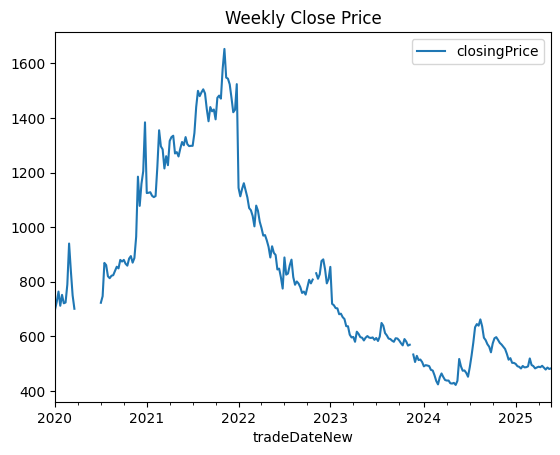

In [27]:
# 4.Convert the daily to weekly format and plot it.
df['tradeDateNew'] = pd.to_datetime(df['tradeDateString'])
df.set_index('tradeDateNew', inplace=True)
weekly_df = df.resample('W').agg({'closingPrice': 'last'})
weekly_df.plot(title='Weekly Close Price')


<Axes: title={'center': 'Monthly Close Price'}, xlabel='tradeDateNew'>

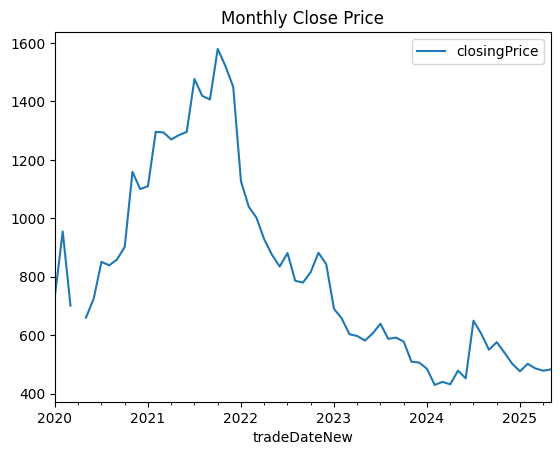

In [28]:
# 5. Convert the data to monthly format and plot it.
monthly_df = df.resample('ME').agg({'closingPrice': 'last'})
monthly_df.plot(title='Monthly Close Price')


<Axes: title={'center': '14-Day Moving Average'}, xlabel='tradeDateNew'>

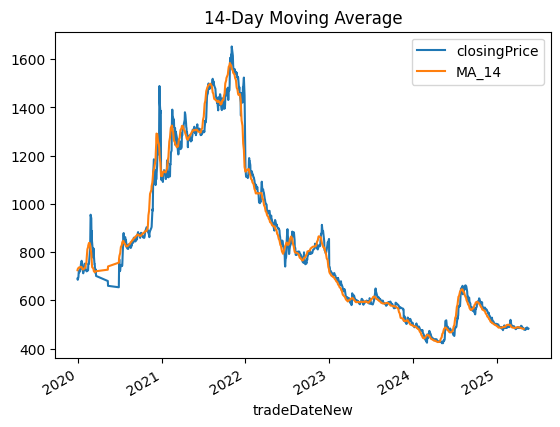

In [29]:
# 6.a. Moving Average
df['MA_14'] = df['closingPrice'].rolling(window=14).mean()
df[['closingPrice', 'MA_14']].plot(title='14-Day Moving Average')

<Axes: title={'center': '14-Day Weighted Moving Average'}, xlabel='tradeDateNew'>

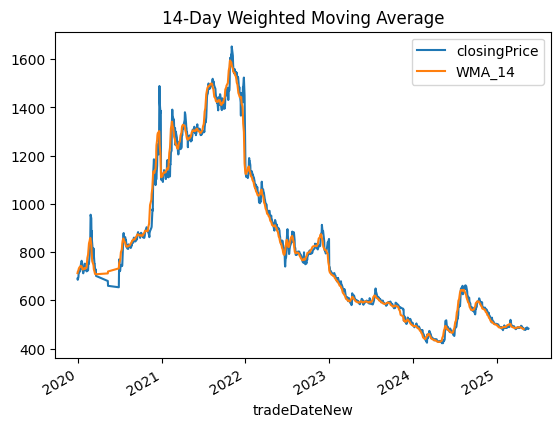

In [30]:
# 6.b.Weighted Moving Average
weights = range(1, 15)
def weighted_moving_avg(prices):
    return (prices * weights).sum() / sum(weights)


df['WMA_14'] = df['closingPrice'].rolling(window=14).apply(weighted_moving_avg, raw=True)

df[['closingPrice', 'WMA_14']].plot(title='14-Day Weighted Moving Average')

<Axes: title={'center': 'RSI (14)'}, xlabel='tradeDateNew'>

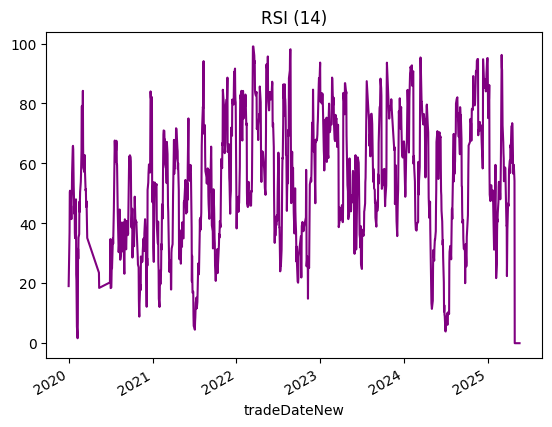

In [31]:
# 6.c.RSI
delta = df['closingPrice'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss

rs = rs.replace([float('inf'), -float('inf')], 100)
rs = rs.fillna(0) # Handle cases where both avg_gain and avg_loss are 0
df['RSI'] = 100 - (100 / (1 + rs))
df['RSI'].plot(title='RSI (14)', color='purple')

<ipython-input-32-d25bac0063df>:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['OBV'].iloc[0] = df['Volume'].iloc[0]
<ipython-input-32-d25bac0063df>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

<Axes: title={'center': 'On-Balance Volume'}, xlabel='tradeDateNew'>

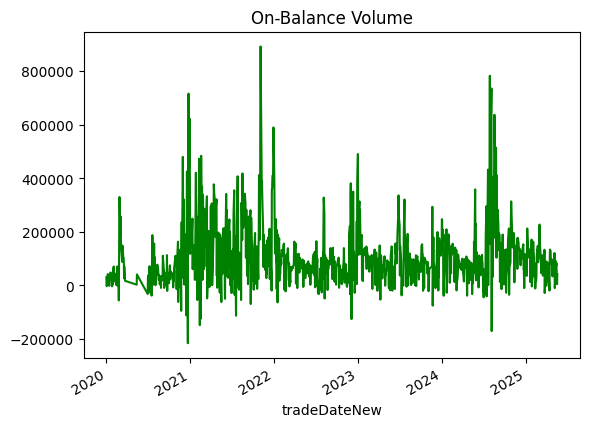

In [32]:
# 6.d.OBV

df['Volume'] = df['volume']
df['OBV'] = 0


price_change = df['closingPrice'].diff()


obv_volume = df['Volume'].where(price_change > 0, -df['Volume'].where(price_change < 0, 0))


if len(df) > 0:
    df['OBV'].iloc[0] = df['Volume'].iloc[0]

    df['OBV'] = obv_volume.cumsum() + df['Volume'].iloc[0] - obv_volume.iloc[0]

if len(df) > 0:
    df['OBV_calc'] = df['Volume']

    df.loc[price_change > 0, 'OBV_calc'] = df['Volume'][price_change > 0] + df['OBV_calc'].shift(1)[price_change > 0]
    df.loc[price_change < 0, 'OBV_calc'] = -df['Volume'][price_change < 0] + df['OBV_calc'].shift(1)[price_change < 0]
    df.loc[price_change == 0, 'OBV_calc'] = df['OBV_calc'].shift(1)[price_change == 0]

    # Handle the very first OBV value explicitly if it wasn't set correctly by the above
    df['OBV_calc'].iloc[0] = df['Volume'].iloc[0]

    # Now set the actual OBV column
    df['OBV'] = df['OBV_calc']
    df = df.drop(columns=['OBV_calc']) # Clean up the temporary column


df['OBV'].plot(title='On-Balance Volume', color='green')

<Axes: title={'center': 'CCI (20)'}, xlabel='tradeDateNew'>

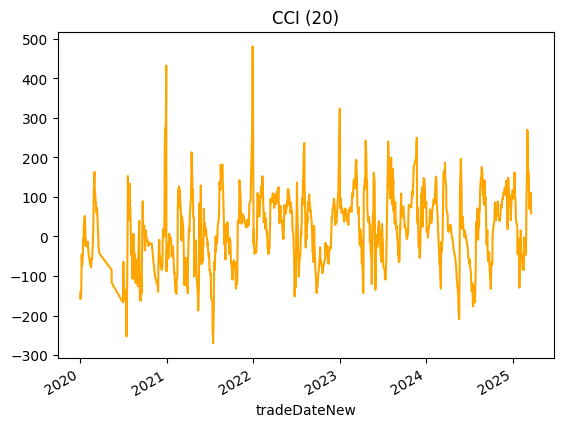

In [33]:
# 6.e.CCI
tp = (df['maxPrice'] + df['minPrice'] + df['closingPrice']) / 3
tp_ma = tp.rolling(20).mean()
tp_md = (tp - tp_ma).abs().rolling(20).mean()
df['CCI'] = (tp - tp_ma) / (0.015 * tp_md)
df['CCI'].plot(title='CCI (20)', color='orange')